x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 1)
x_test shape = (10000, 32, 32, 3)
y_test shape = (10000, 1)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0        

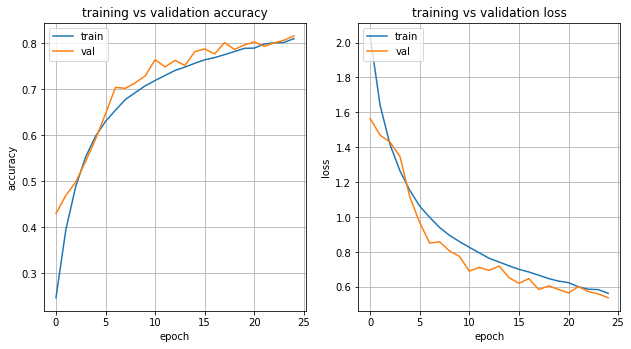


Evaluating model...

313/313 - 6s - loss: 0.5389 - accuracy: 0.8162


In [11]:
# Main file
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.models import load_model
from keras.layers import Dropout
from keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Conv1D, Dense, Flatten, Activation, BatchNormalization
import tensorflow as tf
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

from pathlib import Path

###================================================================================================
### We are using model in the model_0.py file. Change this to load other models.
def model(input_shape):
    input = Input(input_shape)
    X = Conv2D(filters=32, kernel_size=(3,3), padding='same')(input)
    X = Conv2D(filters=32, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(rate=.2)(X)

    X = Conv2D(filters=64, kernel_size=(3,3), padding='same')(X)
    X = Conv2D(filters=64, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(rate=.2)(X)

    X = Conv2D(filters=128, kernel_size=(3,3), padding='same')(X)
    X = Conv2D(filters=128, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(rate=.2)(X)

    X = Conv2D(filters=256, kernel_size=(3,3), padding='same')(X)
    X = Conv2D(filters=256, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(rate=.2)(X)

    X = Flatten()(X)
    X = Dense(units=512, activation='relu')(X)
    X = Dropout(rate=.6)(X)
    X = Dense(units=256, activation='relu')(X)
    X = Dropout(rate=.5)(X)
    X = Dense(units=10, activation='softmax')(X)

    model = Model(inputs=input, outputs=X)
    return model

###================================================================================================
# Specify model name to save model as. eg., "model_0", "model_1", "model_2"
MODEL_NAME = 'model_3'

###================================================================================================
### Plotting function
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

def plot_Acc_And_Loss2(history_dict, save=True):
    """
    Plots loss and accuracy of train and val data over epochs.
    :return:
    """
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(history_dict['accuracy'])
    axs[0].plot(history_dict['val_accuracy'])
    axs[0].set_title('training vs validation accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'val'], loc='upper left')
    axs[0].grid(True)

    axs[1].plot(history_dict['loss'])
    axs[1].plot(history_dict['val_loss'])
    axs[1].set_title('training vs validation loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'val'], loc='upper left')
    axs[1].grid(True)
    set_size(8,4)
    if save: plt.savefig('model_logs/'+MODEL_NAME+'_logs/'+MODEL_NAME+"_loss.png")
    plt.show()


###================================================================================================
BATCH_SIZE = 32
EPOCHS = 25

### CIFAR10 dataset loading:
### Partition data - data is already partioned from unpacking here:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
input_shape = (32,32,3) # get 1st sample's shape.

# Check shape of each partition. Each img is 32x32x3. 50000 in training set, 10000 in test set.
print("x_train shape = " + str(np.shape(x_train)))
print("y_train shape = " + str(np.shape(y_train)))
print("x_test shape = " + str(np.shape(x_test)))
print("y_test shape = " + str(np.shape(y_test)))


###================================================================================================
### Compile a model.
model = model(input_shape)
opt = Adam(learning_rate=.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
model.compile(optimizer=opt, loss=loss, metrics=metrics)
model.summary()


###================================================================================================
### Train and Predict.
model_checkpoint = ModelCheckpoint(filepath='model/'+MODEL_NAME,
                                       verbose=1,
                                       monitor='val_loss',
                                       save_best_only=True)
Path('model_logs/'+MODEL_NAME+'_logs/').mkdir(parents=True)
csv_logger = CSVLogger(filename='model_logs/'+MODEL_NAME+'_logs/'+MODEL_NAME+'_log.csv', separator=',', append=True)
# t0 = len(x_train)//BATCH_SIZE
model_history = model.fit(x=x_train, y=y_train, epochs=EPOCHS, callbacks=[csv_logger, model_checkpoint], validation_data=(x_test, y_test))


###================================================================================================
"""Save model history and plot loss and acc"""
"""
Note!!! If these files already exist, will get an error. 
"""
with open('model/'+MODEL_NAME+'/trainHistoryDict', 'wb') as file_name:
    pickle.dump(model_history.history, file_name)       # Save history dict
plot_Acc_And_Loss2(model_history.history)        # Plot acc and loss over epochs
with open('model_logs/'+MODEL_NAME+'_logs/'+MODEL_NAME+'_summary', 'w') as fh:
    # Pass the file handle in as a lambda function to make it callable
    model.summary(print_fn=lambda x: fh.write(x + '\n'))


###================================================================================================
### Evaluate model.
print("\nEvaluating model...\n")
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

pred_outs = model.predict(x_test)

pred_labels = np.argmax(pred_outs,axis=1)


# t0model = load_model("model/model_0") # Load a saved model from "model/..." and evaluate.
# t0predict = t0model.evaluate(x_test,  y_test, verbose=2)